### [Explanation here]

In [72]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Load train and test datasets
train_df = pd.read_json('../dataset/input/emails_set_train.jsonl', lines=True)
test_df = pd.read_json('../dataset/input/emails_set_test.jsonl', lines=True)

X_train = train_df['text']
y_train = train_df['is_phishing']
X_test = test_df['text']
y_test = test_df['is_phishing']

In [74]:
# Convert email text into TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [75]:
# Evaluate the Random Forest classifier model on test data
random_forest_accuracy = rf.score(X_test_tfidf, y_test)
print("Accuracy of Random Forest classifier:", random_forest_accuracy)

Accuracy of Random Forest classifier: 0.9783333333333334


In [76]:
# Generate predictions
y_pred_rf = rf.predict(X_test_tfidf)

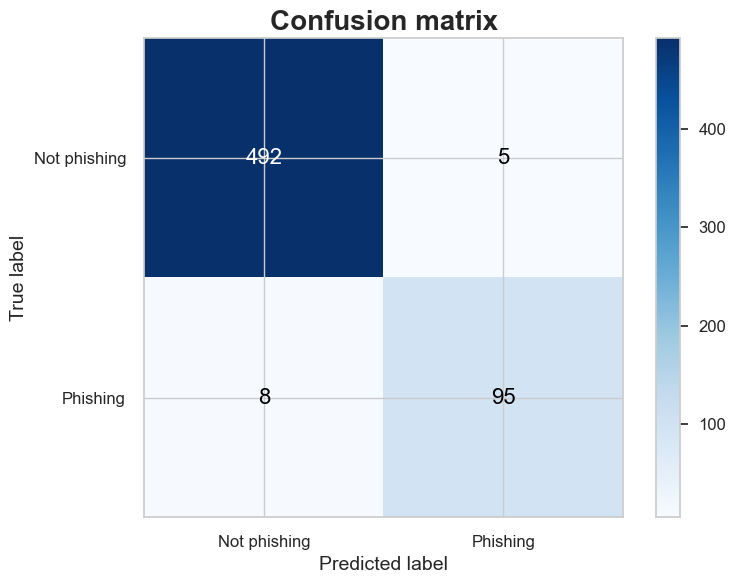

In [81]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Set up plot settings
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion matrix', fontsize=20, fontweight='bold')
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Not phishing', 'Phishing'], fontsize=12)
ax.set_yticklabels(['Not phishing', 'Phishing'], fontsize=12)

# Add text annotations
for i in range(2):
    for j in range(2):
        ax.text(j, i, format(cm[i, j], ',d'), ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=16)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=12)

# Show plot
plt.tight_layout()
plt.show()

Random Forest Classification Report:
               precision    recall  f1-score   support

       False    0.98400   0.98994   0.98696       497
        True    0.95000   0.92233   0.93596       103

    accuracy                        0.97833       600
   macro avg    0.96700   0.95613   0.96146       600
weighted avg    0.97816   0.97833   0.97821       600



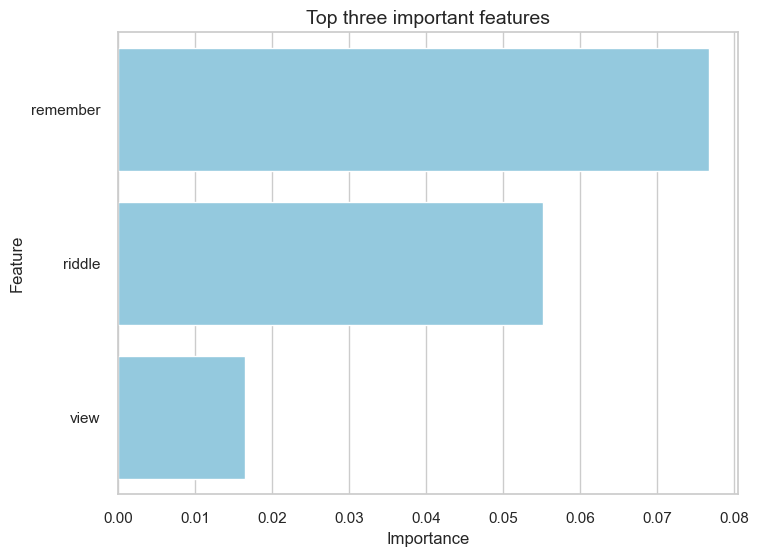

In [82]:
# Print classification reports
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf, digits = 5))

# Plot feature importance
feature_importance = pd.DataFrame(list(zip(list(vectorizer.vocabulary_.keys()), rf.feature_importances_)),
                                  columns=['Feature', 'Importance'])
feature_importance = feature_importance.sort_values(by=['Importance'], ascending=False).head(3)
plt.figure(figsize=(8,6))

sns.barplot(x='Importance', y='Feature', data=feature_importance, color='skyblue')
plt.title('Top three important features', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

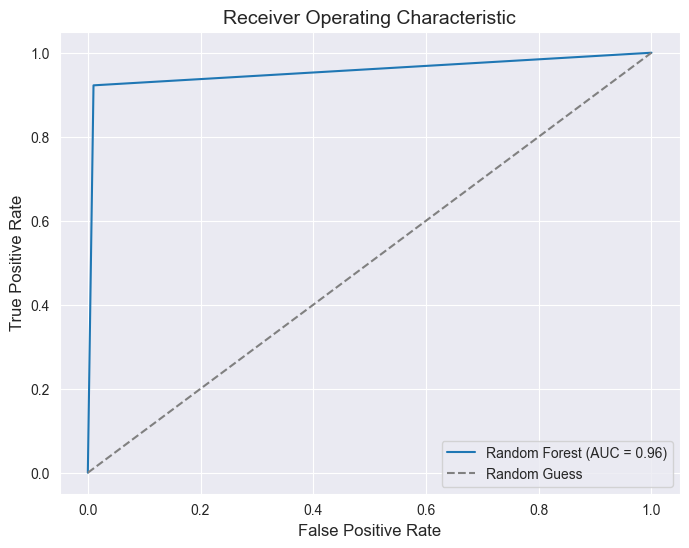

In [79]:
# Compute ROC curve and area under the curve (AUC) for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic', fontsize=14)
plt.legend(loc="lower right")
plt.show()